<a href="https://colab.research.google.com/github/CSID-DGU/2021-1-CECD3-SASO-2/blob/master/NLP/nlpTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.



토큰개수: 14672
14672
3598
[('./Punctuation', 469), ('영화/Noun', 340), ('하다/Verb', 292), ('이/Josa', 288), ('보다/Verb', 237), ('의/Josa', 205), ('../Punctuation', 179), ('에/Josa', 170), ('가/Josa', 169), ('.../Punctuation', 160)]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_

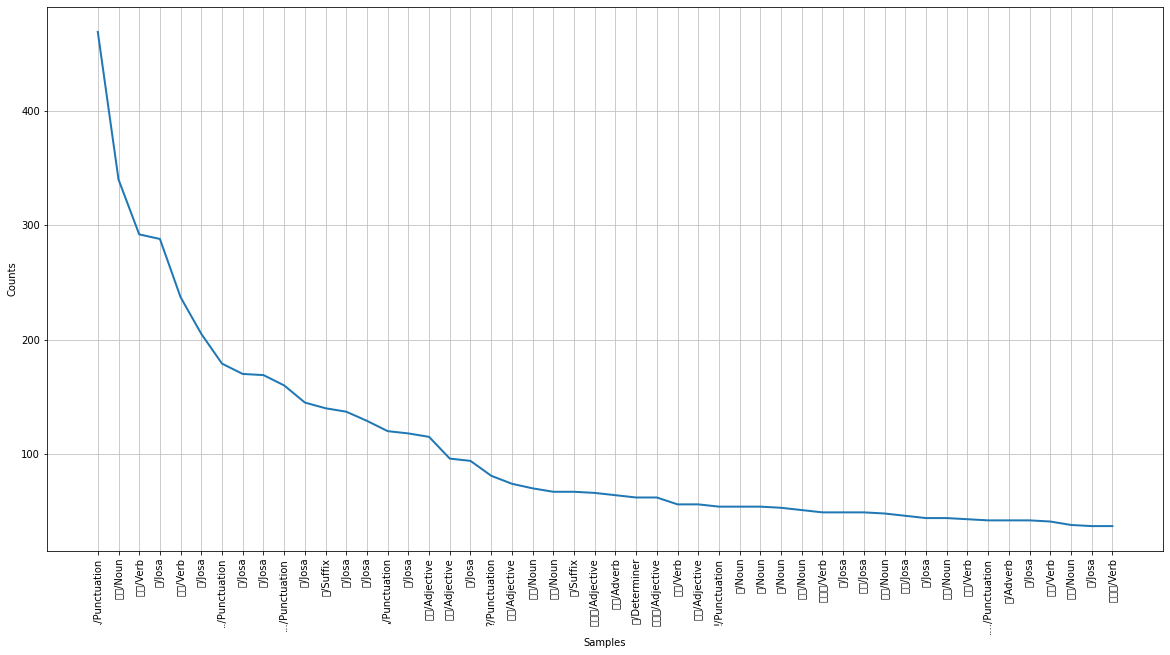

Epoch 1/10
2/2 [==============================] - 1s 5ms/step - loss: 0.6889 - binary_accuracy: 0.5462
Epoch 2/10
2/2 [==============================] - 0s 8ms/step - loss: 0.6696 - binary_accuracy: 0.6237
Epoch 3/10
2/2 [==============================] - 0s 10ms/step - loss: 0.6573 - binary_accuracy: 0.6640
Epoch 4/10
2/2 [==============================] - 0s 9ms/step - loss: 0.6449 - binary_accuracy: 0.6872
Epoch 5/10
2/2 [==============================] - 0s 8ms/step - loss: 0.6316 - binary_accuracy: 0.7056
Epoch 6/10
2/2 [==============================] - 0s 25ms/step - loss: 0.6173 - binary_accuracy: 0.7181
Epoch 7/10
2/2 [==============================] - 0s 8ms/step - loss: 0.6099 - binary_accuracy: 0.7269
Epoch 8/10
2/2 [==============================] - 0s 8ms/step - loss: 0.6013 - binary_accuracy: 0.7381
Epoch 9/10
2/2 [==============================] - 0s 6ms/step - loss: 0.5866 - binary_accuracy: 0.7427
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from google.colab import drive
from konlpy.tag import Okt
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import nltk
import time

okt = Okt()
plt.rc('font', family='NanumBarunGothic') 

drive.mount('/content/drive')

#tokenize 함수
def tokenize(doc):
  #형태소와 품사를 join
  return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

#파일 경로
train_path = '/content/drive/MyDrive/Colab Notebooks/nlp/ratings_train.txt'
test_path = '/content/drive/MyDrive/Colab Notebooks/nlp/ratings_test.txt'


#pandas 로 불러온다
train_df = pd.read_csv(train_path, '\t')
test_df = pd.read_csv(test_path, '\t')


#리뷰가 널인 경우 , '' 값으로 대체
train_df.isnull().any() #document에 null값이 있다.
train_df['document'] = train_df['document'].fillna(''); #null값을 ''값으로 대체

test_df.isnull().any()
test_df['document'] = test_df['document'].fillna(''); #null값을 ''값으로 대체

#10000개 데이터
newData = []
for i in tqdm(range(1000)):
  newData.append(train_df.values[i])

#Toeknize 과정
new_docs = [(tokenize(row[1]), row[2]) for row in tqdm(newData)]
# train_docs = [(tokenize(row[1]), row[2]) for row in tqdm(train_df.values)]
# test_docs = [(tokenize(row[1]), row[2]) for row in tqdm(test_df.values)]

#토큰 구하기
tokens = [t for d in new_docs for t in d[0]]
print("토큰개수:", len(tokens))

#nltk 를 통한 전처리
text = nltk.Text(tokens, name='NMSC')

#토큰개수
print(len(text.tokens))

#중복을 제외한 토큰개수
print(len(set(text.tokens)))

#출력빈도가 높은 상위 토큰 10개
print(text.vocab().most_common(10))

#상위 토큰 10개 matpolib 으로 출력
plt.figure(figsize=(20,10))
text.plot(50)


#모델을 만들기 위해 벡터화
#문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW(Bag of Words) 인코딩한 벡터를 만드는 역할
FREQUENCY_COUNT = 100;
selected_words = [f[0] for f in text.vocab().most_common(FREQUENCY_COUNT)]

#단어리스트 문서에서 상위 10000개들중 포함되는 단어들이 개수
def term_frequency(doc):
    return [doc.count(word) for word in selected_words]


x_new = [term_frequency(d) for d,_ in new_docs]
#라벨(1 or 0)
y_new = [c for _,c in new_docs]

#float 형으로 형변환
x_new = np.asarray(x_new).astype('float32')
y_new = np.asarray(y_new).astype('float32')

#레이어 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#학습 프로세스 설정
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[tf.keras.metrics.binary_accuracy]
    )

#학습 데이터로 학습
model.fit(x_new, y_new, epochs=10, batch_size=512)


results = model.evaluate(x_new, y_new)

results

def predict_review(review):
    token = tokenize(review)
    tfq = term_frequency(token)
    data = np.expand_dims(np.asarray(tfq).astype('float32'), axis=0)
    score = float(model.predict(data))
    if(score > 0.5):
        print(f"{review} ==> 긍정 ({round(score*100)}%)")
    else:
        print(f"{review} ==> 부정 ({round((1-score)*100)}%)")

predict_review("영화 내용은 별로였지만 연기는 괜찮았어요")

In [ ]:
from konlpy.tag import Okt
okt = Okt()

#tokenize 함수
def tokenize(doc):
  #형태소와 품사를 join
  return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

text = "이 병원은 약 처방에 별로 좋지 않네요. 근데 의사 선생님은 친절하세요."

a = tokenize(text)
print(a)

['이/Noun', '병원/Noun', '은/Josa', '약/Noun', '처방/Noun', '에/Josa', '별로/Noun', '좋다/Adjective', '않다/Verb', './Punctuation', '근데/Adverb', '의사/Noun', '선생님/Noun', '은/Josa', '친절하다/Adjective', './Punctuation']
